<a href="https://colab.research.google.com/github/jaiyeoba-1/Projects/blob/main/Visualizations_on_Amazon_Review_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries and Load Data

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')  # Download stopwords if not already downloaded
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from datetime import datetime, timedelta
import random


import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('/content/smartwatch-reviews.csv')
df.head()

,Product Name,Name,Stars,Title,Date,Description
0,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Karthikeyan,5.0,5.0 out of 5 stars\nGood and reliable watch.,NaN,Very good in terms of features and amazing qua...
1,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Vishvesh,4.0,4.0 out of 5 stars\nThe Perfect Budget Apple W...,NaN,This is the first time I am using an Apple Wat...
2,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Bindu,5.0,5.0 out of 5 stars\nGood One,NaN,Simple look with basic features.\nRead more
3,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Sandhyaram,2.0,2.0 out of 5 stars\nBattery problem,NaN,2h charging 100%\nRead more
4,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Suresh,1.0,1.0 out of 5 stars\nNot as per image,NaN,Screen is very small\nRead more


## WordClouds

In [ ]:
# Generate random datetime values within a specific range (e.g., past year)
start_date = datetime.now() - timedelta(days=365)
end_date = datetime.now()

def random_date(start, end):
  delta = end - start
  int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
  random_second = random.randrange(int_delta)
  return start + timedelta(seconds=random_second)

# Create a list of random datetime values
random_dates = [random_date(start_date, end_date) for _ in range(len(df))]

# Add a new column "Date" with the random datetime values
df['Date'] = random_dates

df.head()

,Product Name,Name,Stars,Title,Date,Description
0,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Karthikeyan,5.0,5.0 out of 5 stars\nGood and reliable watch.,2023-12-28 15:51:12.028531,Very good in terms of features and amazing qua...
1,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Vishvesh,4.0,4.0 out of 5 stars\nThe Perfect Budget Apple W...,2024-07-23 14:20:37.028531,This is the first time I am using an Apple Wat...
2,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Bindu,5.0,5.0 out of 5 stars\nGood One,2024-02-03 14:11:42.028531,Simple look with basic features.\nRead more
3,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Sandhyaram,2.0,2.0 out of 5 stars\nBattery problem,2024-07-16 17:57:07.028531,2h charging 100%\nRead more
4,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Suresh,1.0,1.0 out of 5 stars\nNot as per image,2024-08-20 06:25:59.028531,Screen is very small\nRead more


### Visualizing the Most Common Words

In [ ]:
# Removing stop words and punctuations
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
  if isinstance(text, str):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)
  else:
    return ''

# Assuming you want to remove stopwords from a specific column, e.g., 'review_text'
df['review_text_no_stopwords'] = df['Description'].apply(preprocess_text)

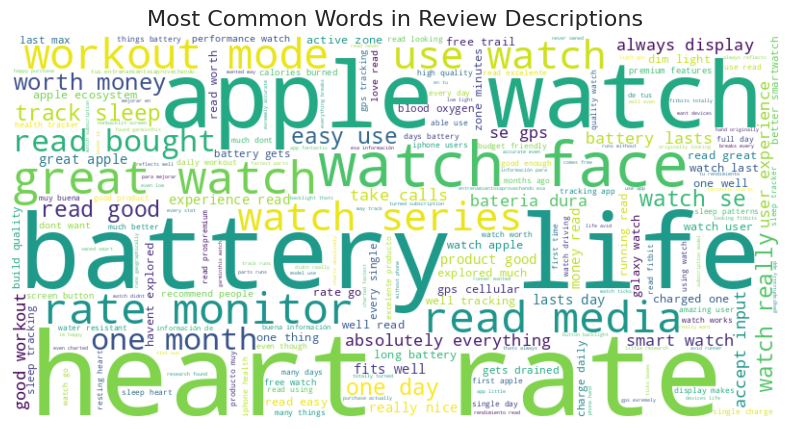

In [ ]:
# Combine all review descriptions into one string
text = " ".join(review for review in df['review_text_no_stopwords'].dropna())

# Generate a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Review Descriptions", fontsize=16)
plt.show()

### Weighted Wordclouds

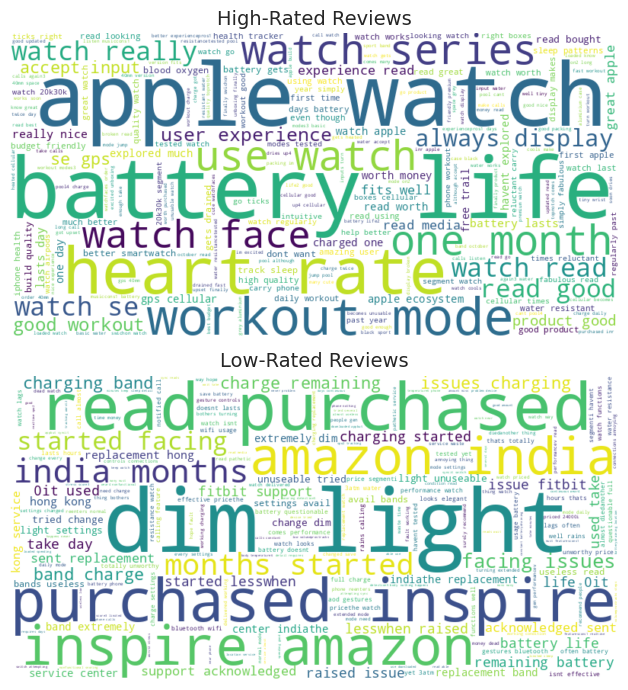

In [ ]:
# Separate high-rated and low-rated reviews
high_rated = " ".join(review for review in df[df['Stars'] >= 4]['review_text_no_stopwords'].dropna())
low_rated = " ".join(review for review in df[df['Stars'] <= 2]['review_text_no_stopwords'].dropna())

# Generate high-rated wordcloud
high_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(high_rated)

# Generate low-rated wordcloud
low_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(low_rated)

# Display the wordclouds side by side
fig, axs = plt.subplots(2, 1, figsize=(15, 7))
axs[0].imshow(high_wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title("High-Rated Reviews", fontsize=14)

axs[1].imshow(low_wordcloud, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title("Low-Rated Reviews", fontsize=14)

plt.tight_layout()
plt.show()

## Frequency Charts

<ipython-input-65-39d8a50907c4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')


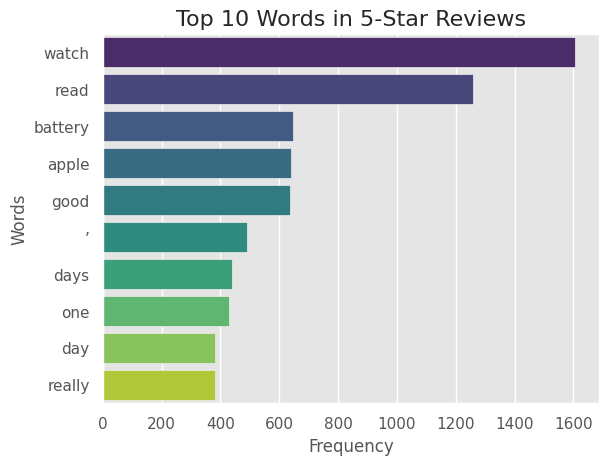

In [ ]:
from collections import Counter
import seaborn as sns

# Tokenize the review descriptions for 5-star reviews
from nltk.tokenize import word_tokenize

five_star_reviews = " ".join(review for review in df[df['Stars'] == 5]['review_text_no_stopwords'].dropna())
tokens = word_tokenize(five_star_reviews.lower())

# Count word frequencies
common_words = Counter(tokens).most_common(10)

# Create a DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot the bar chart
sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')
plt.title("Top 10 Words in 5-Star Reviews", fontsize=16)
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

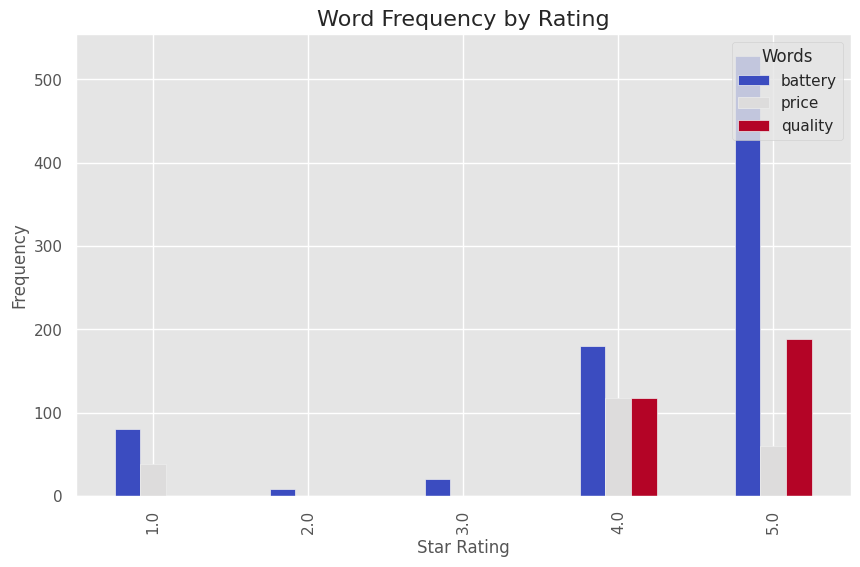

In [ ]:
# Define words to compare
words_to_compare = ['battery', 'price', 'quality']

# Count occurrences of each word by rating
word_freq_by_rating = {word: df[df['Description'].str.contains(word, case=False, na=False)]['Stars'].value_counts() for word in words_to_compare}

# Create a DataFrame for plotting
freq_df = pd.DataFrame(word_freq_by_rating).fillna(0)

# Plot as a bar chart
freq_df.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title("Word Frequency by Rating", fontsize=16)
plt.xlabel("Star Rating")
plt.ylabel("Frequency")
plt.legend(title="Words", loc='upper right')
plt.show()


In [ ]:
df['Product Name'].unique()

array(['Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smartwatch with Starlight Aluminum Case with Starlight Sport Loop One Size. Fitness & Sleep Tracker, Crash Detection, Heart Rate Monitor, Retina Display',
       'Apple Watch SE (GPS + Cellular, 40mm) - Space Grey Aluminium Case with Midnight Sport Band - Regular',
       'Apple Watch Series 8 [GPS 45 mm] Smart Watch w/Midnight Aluminium Case with Midnight Sport Band. Fitness Tracker, Blood Oxygen & ECG Apps, Always-On Retina Display, Water Resistant',
       'Fitbit Inspire 2 Health & Fitness Tracker with a Free 1-Year Premium Trial, 24/7 Heart Rate, Black/Black, One Size (S & L Bands Included)',
       'Fitbit Versa 4 Fitness Watch (Black/Graphite Aluminium) with 6-Month Premium Membership',
       'Fitbit Inspire 3 Health & Fitness Tracker (Midnight Zen/Black) with 6-Month Premium Membership',
       'Garmin Vivoactive 3 GPS Smartwatch, 1.2 inch',
       'Garmin Forerunner 55, GPS Running Watch with Daily Suggested Workouts, Up to 2 

In [ ]:
product_name_mapping = {
    'Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smartwatch with Starlight Aluminum Case with Starlight Sport Loop One Size. Fitness & Sleep Tracker, Crash Detection, Heart Rate Monitor, Retina Display': 'Apple Watch SE (2023)',
    'Apple Watch SE (GPS + Cellular, 40mm) - Space Grey Aluminium Case with Midnight Sport Band - Regular': 'Apple Watch SE (Cellular)',
    'Apple Watch Series 8 [GPS 45 mm] Smart Watch w/Midnight Aluminium Case with Midnight Sport Band. Fitness Tracker, Blood Oxygen & ECG Apps, Always-On Retina Display, Water Resistant': 'Apple Watch Series 8',
    'Fitbit Inspire 2 Health & Fitness Tracker with a Free 1-Year Premium Trial, 24/7 Heart Rate, Black/Black, One Size (S & L Bands Included)': 'Fitbit Inspire 2',
    'Fitbit Versa 4 Fitness Watch (Black/Graphite Aluminium) with 6-Month Premium Membership': 'Fitbit Versa 4',
    'Fitbit Inspire 3 Health & Fitness Tracker (Midnight Zen/Black) with 6-Month Premium Membership': 'Fitbit Inspire 3',
    'Garmin Vivoactive 3 GPS Smartwatch, 1.2 inch': 'Garmin Vivoactive 3',
    'Garmin Forerunner 55, GPS Running Watch with Daily Suggested Workouts, Up to 2 Weeks of Battery Life (Whitestone)': 'Garmin Forerunner 55',
    'Garmin Forerunner 45, 42MM Easy-to-Use GPS Running Watch with Garmin Coach Free Training Plan Support, Red (No-Cost EMI Available)': 'Garmin Forerunner 45',
    "Fossil Gen 6 Digital Black Dial Men's Watch-FTW4059": "Fossil Gen 6 Digital",
    'Fossil Gen 6 Display Wellness Edition Black Smartwatch FTW4069': 'Fossil Gen 6 Display'
}

df['Product Name Short'] = df['Product Name'].map(product_name_mapping)

print(df[['Product Name', 'Product Name Short']].head())

                                        Product Name     Product Name Short
0  Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...  Apple Watch SE (2023)
1  Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...  Apple Watch SE (2023)
2  Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...  Apple Watch SE (2023)
3  Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...  Apple Watch SE (2023)
4  Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...  Apple Watch SE (2023)


<ipython-input-69-ac6b678b4f93>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Name Short', y='Stars', data=avg_rating, palette='muted')


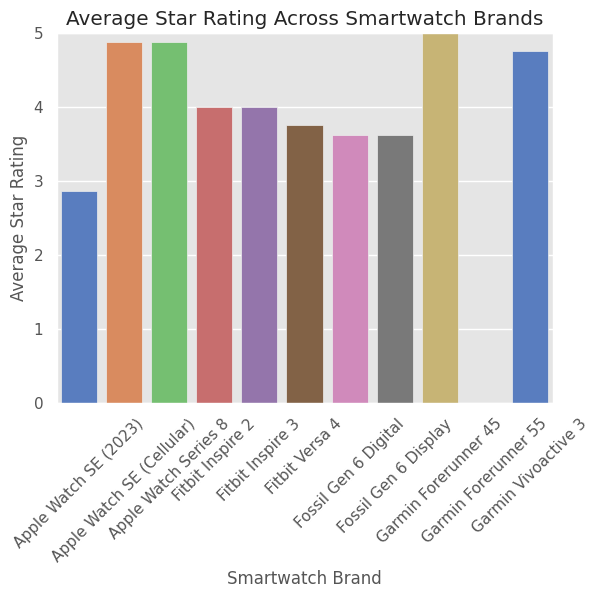

In [ ]:
# Calculate average star rating for each product
avg_rating = df.groupby('Product Name Short')['Stars'].mean().reset_index()

# Plot the average ratings
sns.barplot(x='Product Name Short', y='Stars', data=avg_rating, palette='muted')
plt.title("Average Star Rating Across Smartwatch Brands")
plt.xlabel("Smartwatch Brand")
plt.ylabel("Average Star Rating")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.show()


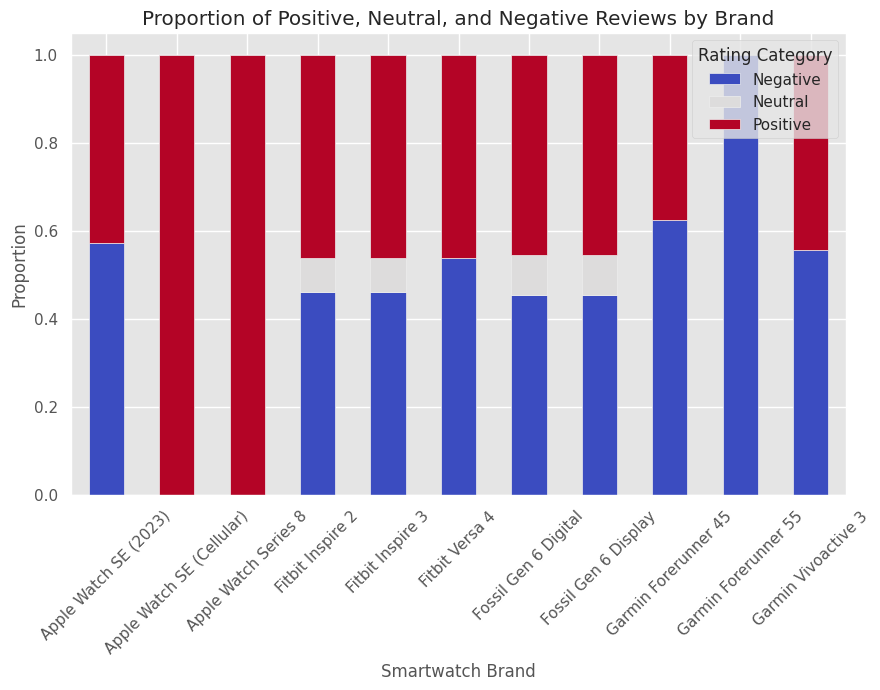

In [ ]:
# Define rating categories
def categorize_rating(stars):
    if stars >= 4:
        return 'Positive'
    elif stars == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Add a new column for rating categories
df['Rating Category'] = df['Stars'].apply(categorize_rating)

# Calculate proportions by product
rating_proportions = df.groupby(['Product Name Short', 'Rating Category']).size().unstack(fill_value=0)
rating_proportions = rating_proportions.div(rating_proportions.sum(axis=1), axis=0)

# Plot the proportions
rating_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Proportion of Positive, Neutral, and Negative Reviews by Brand")
plt.xlabel("Smartwatch Brand")
plt.ylabel("Proportion")
plt.legend(title="Rating Category", loc="upper right")
plt.xticks(rotation=45)
plt.show()


<ipython-input-71-ca05d9de1cab>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product Name Short', y='Stars', data=df, palette='Set3')


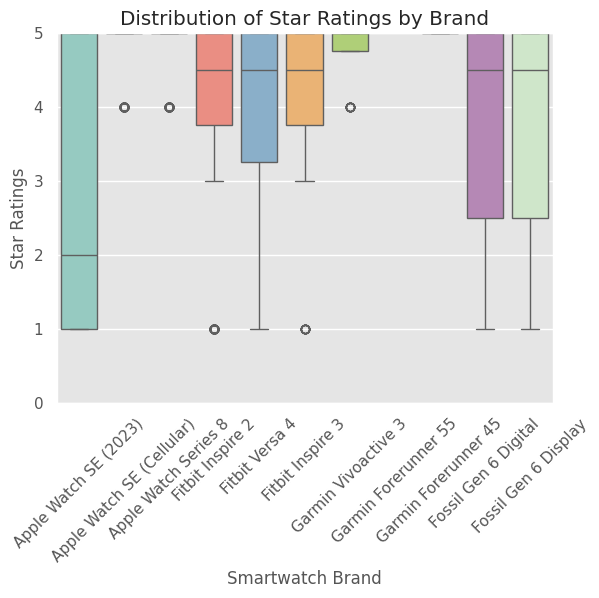

In [ ]:
sns.boxplot(x='Product Name Short', y='Stars', data=df, palette='Set3')
plt.title("Distribution of Star Ratings by Brand")
plt.xlabel("Smartwatch Brand")
plt.ylabel("Star Ratings")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.show()


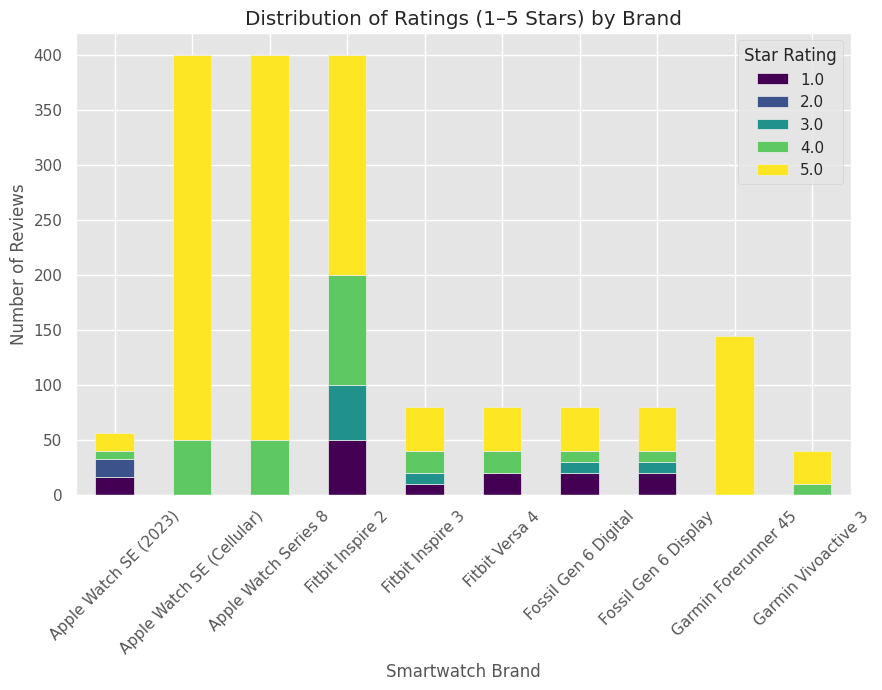

In [ ]:
# Count the number of each star rating per product
rating_counts = df.groupby(['Product Name Short', 'Stars']).size().unstack(fill_value=0)

# Plot the stacked bar chart
rating_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Distribution of Ratings (1–5 Stars) by Brand")
plt.xlabel("Smartwatch Brand")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Star Rating", loc="upper right")
plt.show()


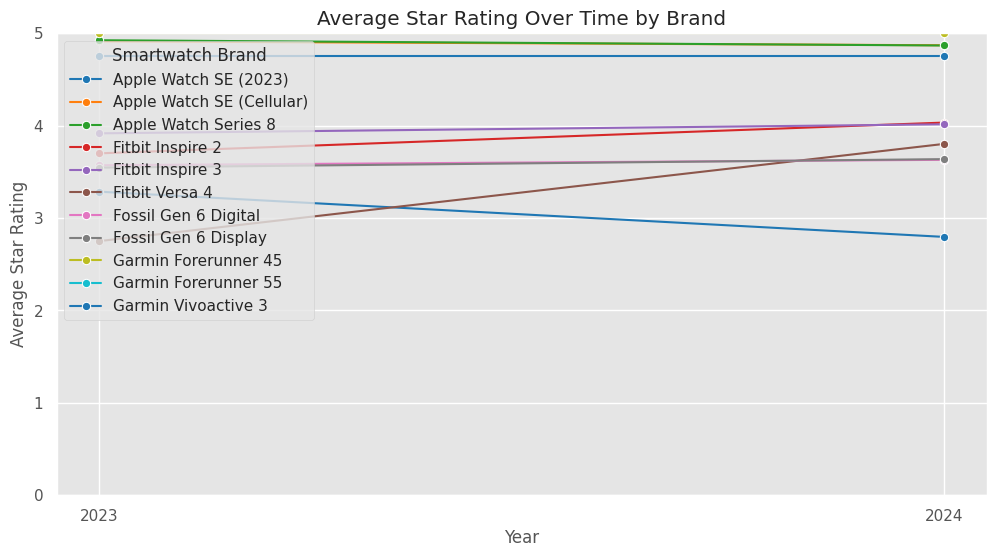

In [ ]:
# Convert Date to datetime and extract year
df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year

# Calculate yearly average star rating for each product
yearly_avg = df.groupby(['Year', 'Product Name Short'])['Stars'].mean().reset_index()

# Plot the timeline
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg, x='Year', y='Stars', hue='Product Name Short', marker='o', palette='tab10')
plt.title("Average Star Rating Over Time by Brand")
plt.xlabel("Year")
plt.ylabel("Average Star Rating")
plt.xticks(yearly_avg['Year'].dropna().unique())
plt.ylim(0, 5)
plt.legend(title="Smartwatch Brand", loc="upper left")
plt.grid(True)
plt.show()

<ipython-input-80-44566f06da1c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Name Short', y='Stars', data=avg_rating, palette='rocket')


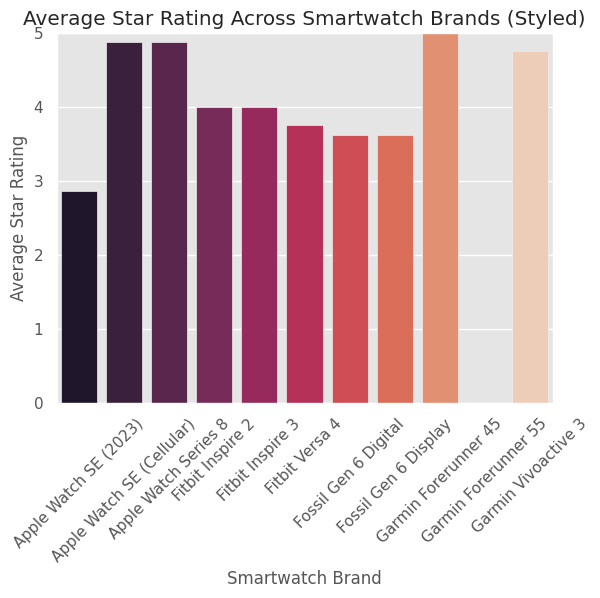

In [ ]:

sns.barplot(x='Product Name Short', y='Stars', data=avg_rating, palette='rocket')
plt.title("Average Star Rating Across Smartwatch Brands (Styled)")
plt.xlabel("Smartwatch Brand")
plt.ylabel("Average Star Rating")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.show()


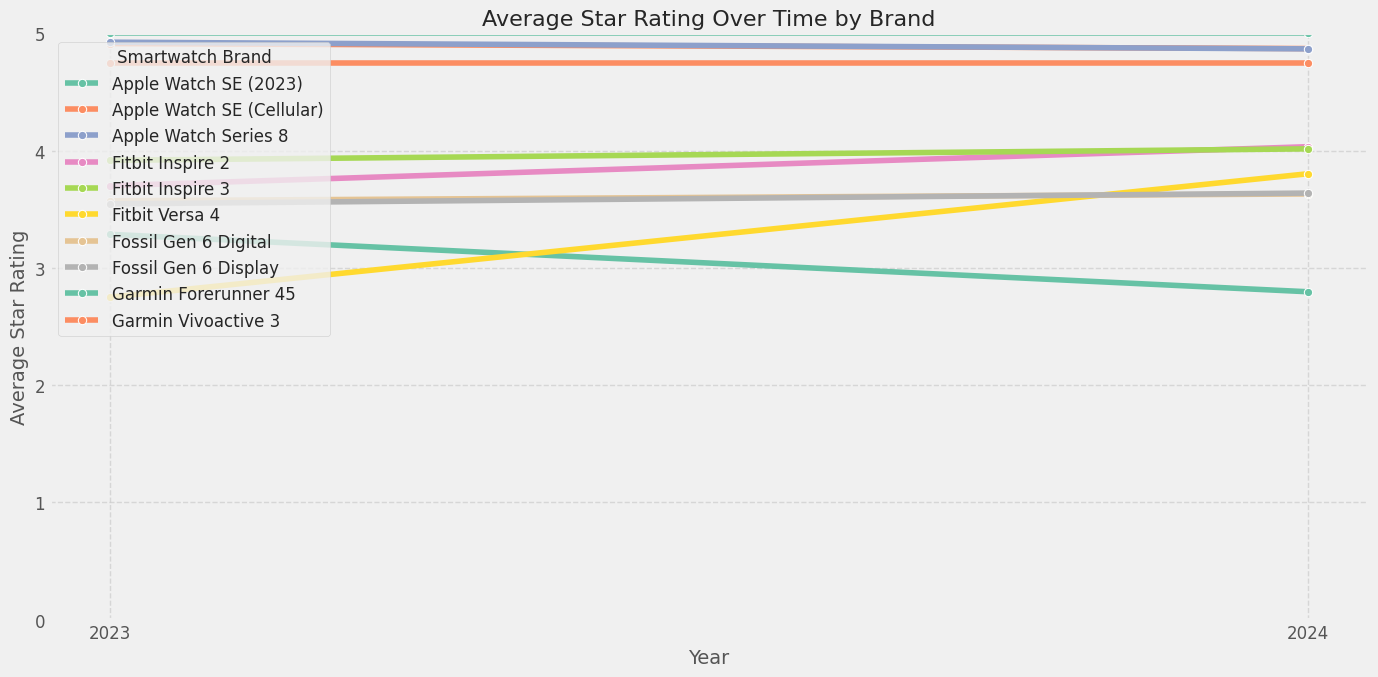

In [ ]:
# Apply a Matplotlib style
plt.style.use('fivethirtyeight')

# Replot a line chart with the new style
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_avg, x='Year', y='Stars', hue='Product Name Short', marker='o', palette='Set2')
plt.title("Average Star Rating Over Time by Brand", fontsize=16)  # Increase title font size
plt.xlabel("Year", fontsize=14)  # Increase axis label font sizes
plt.ylabel("Average Star Rating", fontsize=14)
plt.xticks(yearly_avg['Year'].dropna().unique(), fontsize=12)  # Increase tick label font size
plt.yticks(fontsize=12)
plt.ylim(0, 5)
plt.legend(title="Smartwatch Brand", loc="upper left", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Adjust grid appearance
plt.tight_layout()  # Ensure elements don't overlap
plt.show()
